In [2]:
# Install Essential Libraries
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

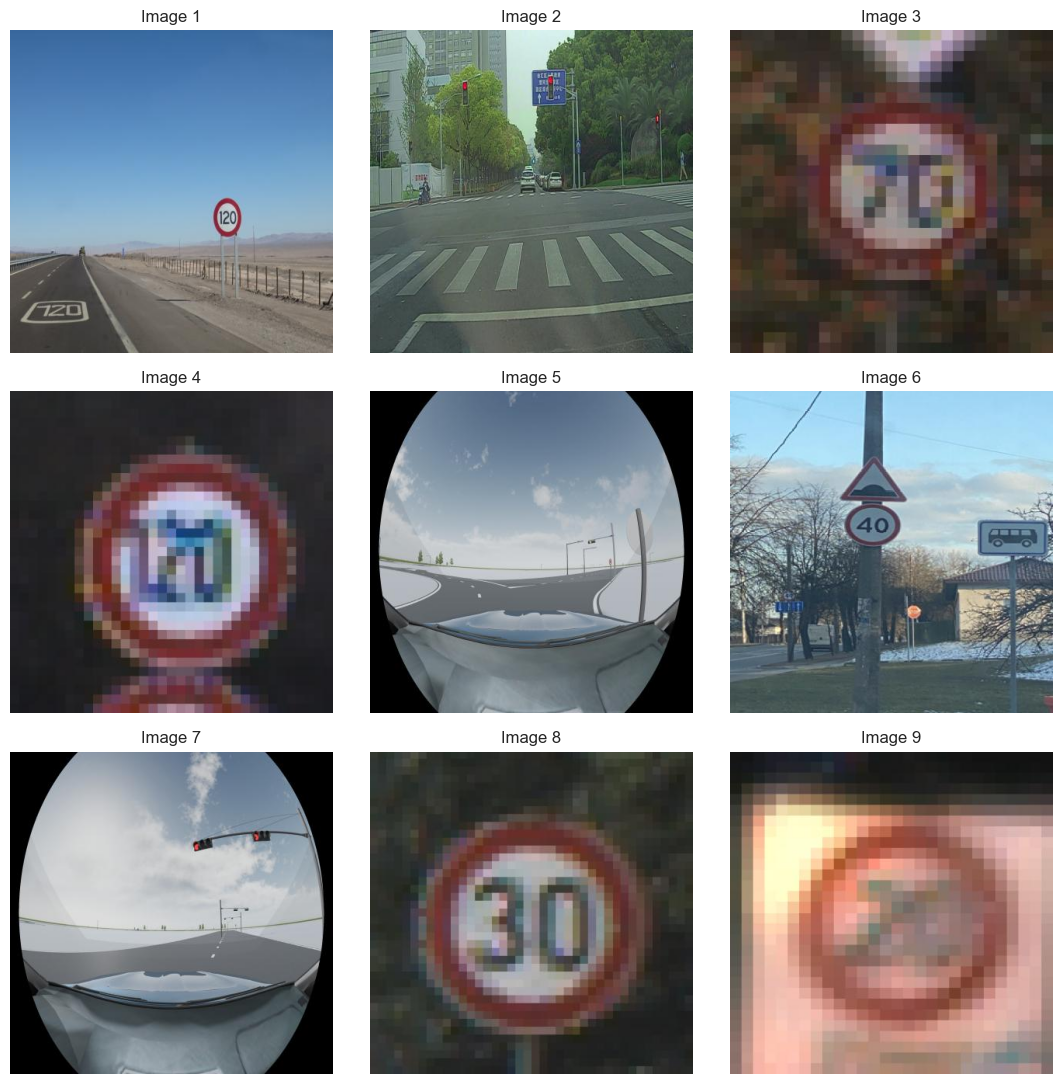

In [12]:
Image_dir = 'D:\\GuruJI\\YOLO\\car\\train\\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Get the size of the image
image = cv2.imread("D:\\GuruJI\\YOLO\\car\\train\\images\\00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 D:\GuruJI\YOLO\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 601.7ms
Speed: 178.5ms preprocess, 601.7ms inference, 60.0ms postprocess per image at shape (1, 3, 640, 640)


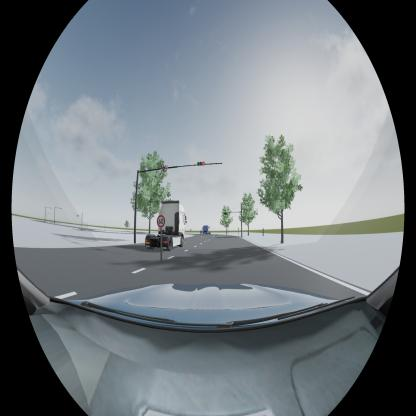

In [18]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "D:\\GuruJI\\YOLO\\car\\train\\images\\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [19]:
!pip install --upgrade ultralytics ray


Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 8.0.10 Requires-Python >=3.7,<=3.11; 8.0.11 Requires-Python >=3.7,<=3.11; 8.0.12 Requires-Python >=3.7,<=3.11; 8.0.13 Requires-Python >=3.7,<=3.11; 8.0.14 Requires-Python >=3.7,<=3.11; 8.0.15 Requires-Python >=3.7,<=3.11; 8.0.16 Requires-Python >=3.7,<=3.11; 8.0.17 Requires-Python >=3.7,<=3.11; 8.0.18 Requires-Python >=3.7,<=3.11; 8.0.19 Requires-Python >=3.7,<=3.11; 8.0.20 Requires-Python >=3.7,<=3.11; 8.0.21 Requires-Python >=3.7,<=3.11; 8.0.22 Requires-Python >=3.7,<=3.11; 8.0.23 Requires-Python >=3.7,<=3.11; 8.0.24 Requires-Python >=3.7,<=3.11; 8.0.25 Requires-Python >=3.7,<=3.11; 8.0.26 Requires-Python >=3.7,<=3.11; 8.0.27 Requires-Python >=3.7,<=3.11; 8.0.28 Requires-Python >=3.7,<=3.11; 8.0.29 Requires-Python >=3.7,<=3.11; 8.0.30 Requires-Python >=3.7,<=3.11; 8.0.31 Requires-Python >=3.7,<=3.11; 8.0.32 Requires-Python >=3.7,<=3.11; 8.0.33 Requires-Python >=3.7,<=3.11; 8.0.34 Requires-Python >=3.7,<=3.

In [23]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(
    data="D:\\GuruJI\\YOLO\\car\\data.yaml",
    epochs=20,
    batch=-1,
    optimizer='auto',
    save=True,          # Save checkpoints
    save_period=1,      # Save every epoch
    val=True,           # Enable validation
    plots=True,         # Save training plots
    verbose=True        # Print detailed logs including val loss
)

# Print val loss after each epoch using results
print("\n========== Validation Loss Per Epoch ==========")
if hasattr(Result_Final_model, 'results_dict'):
    for key, value in Result_Final_model.results_dict.items():
        if 'val' in key.lower() and 'loss' in key.lower():
            print(f"{key}: {value:.4f}")

# Path to best model
best_model_path = os.path.join(Final_model.trainer.save_dir, 'weights', 'best.pt')
print(f"\n✅ Best model saved at: {best_model_path}")

# Load and verify best model
best_model = YOLO(best_model_path)
print("✅ Best model loaded successfully!")

New https://pypi.org/project/ultralytics/8.4.14 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.243  Python-3.13.12 torch-2.9.1+cpu CPU (Intel Core i5-8400H 2.50GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\GuruJI\YOLO\car\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=Non

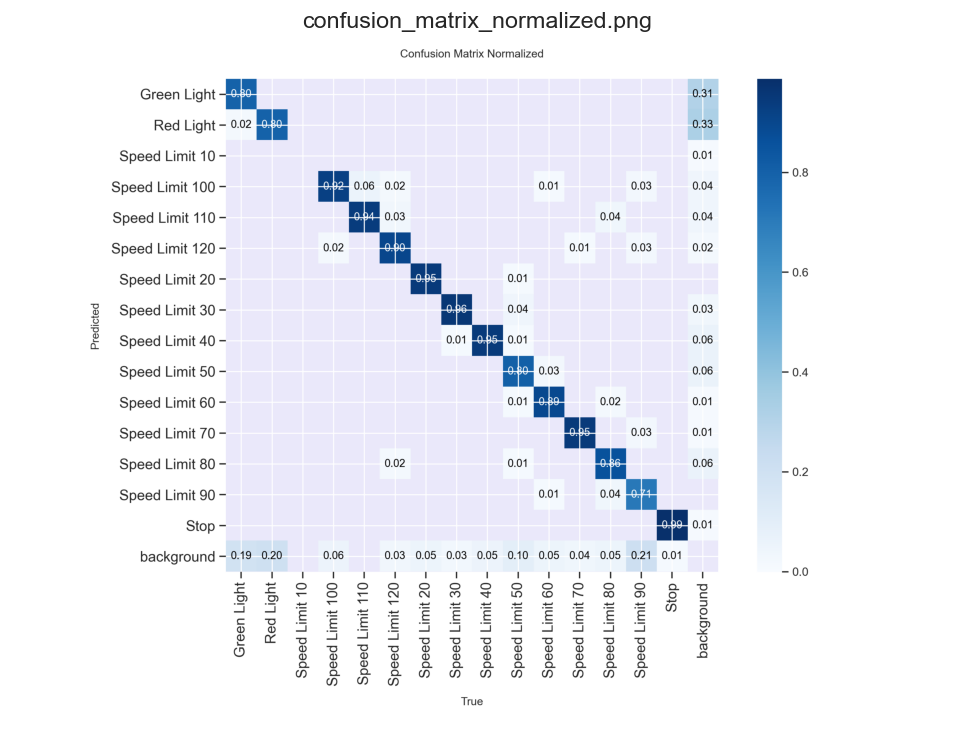

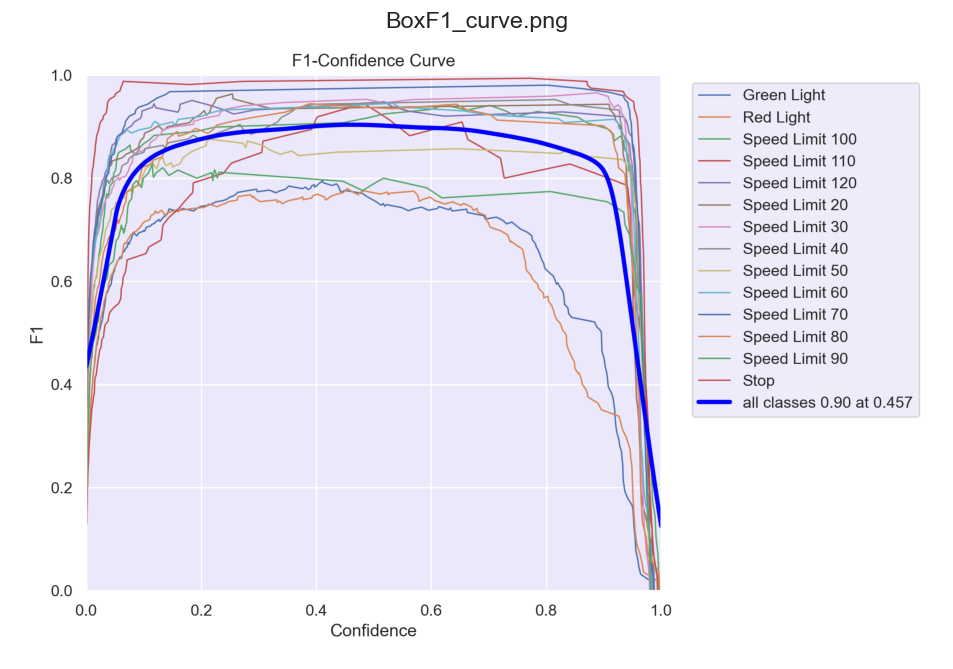

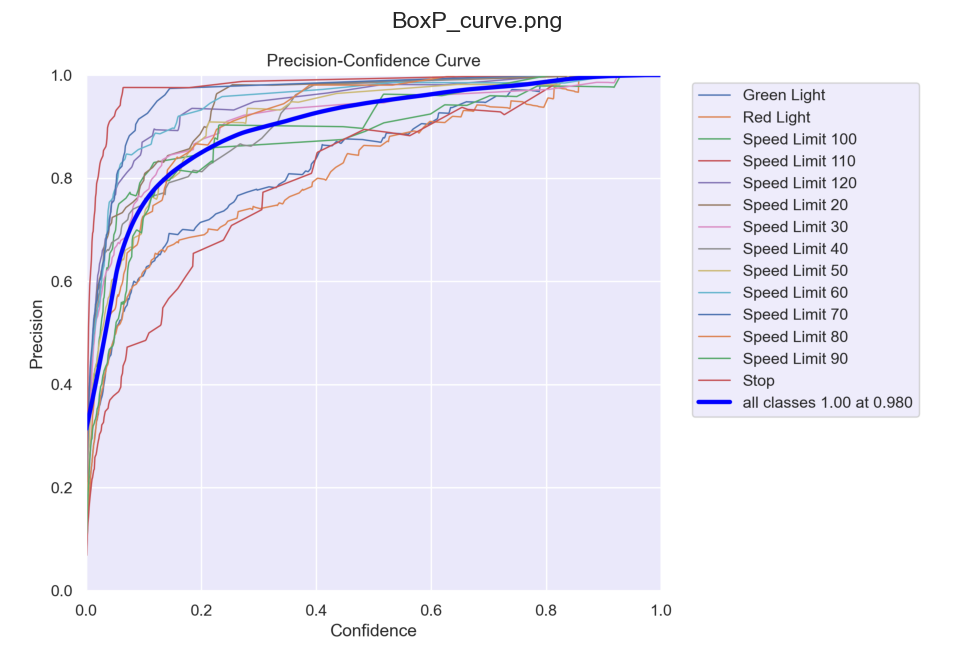

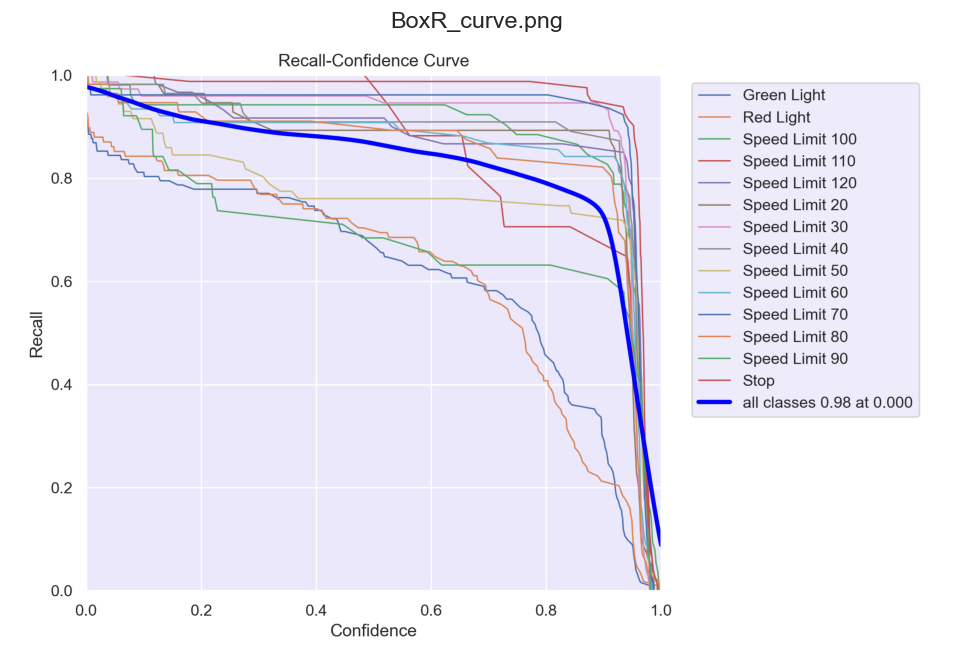

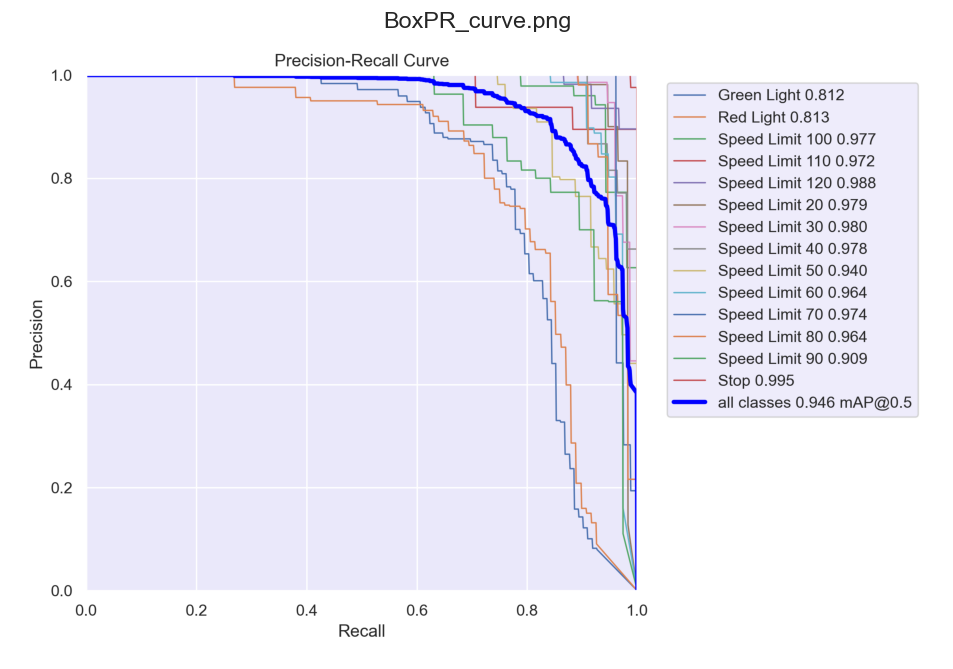

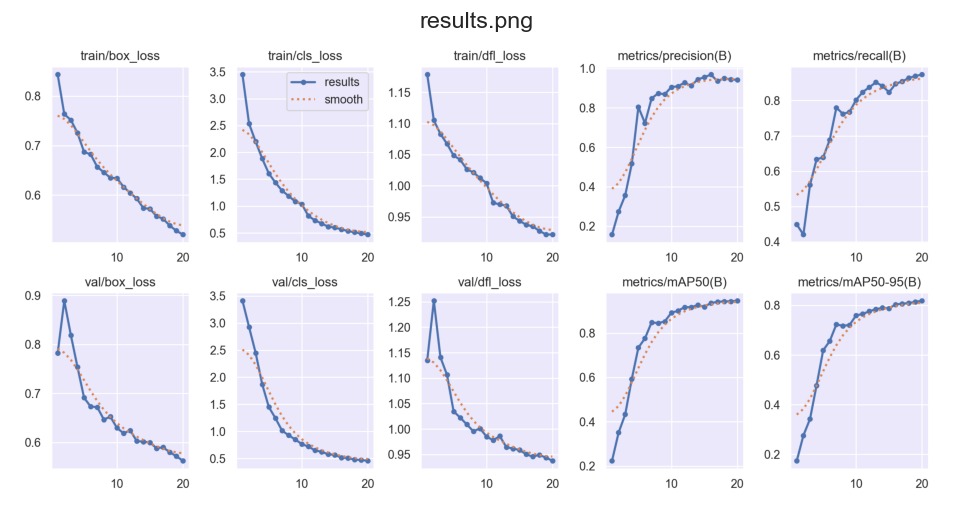

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        
        if not os.path.exists(image_path):
            print(f"⚠️ File not found: {image_path}")
            continue
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.title(image_file, fontsize=14)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

# ✅ Fixed: Point to the FOLDER, not a file
post_training_files_path = r"D:\GuruJI\YOLO\train4"

# Display the images
display_images(post_training_files_path, image_files)

In [32]:
Result_Final_model = pd.read_csv('D:\\GuruJI\\YOLO\\train4\\results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
10     11  36203.3         0.61634         0.81636         0.97282   
11     12  38283.1         0.60449         0.73408         0.97011   
12     13  48361.0         0.59287         0.67686         0.96804   
13     14  50454.2         0.57365         0.61643         0.95090   
14     15  52549.0         0.57223         0.59820         0.94379   
15     16  54642.5         0.55734         0.56876         0.93753   
16     17  56741.3         0.55213         0.53456         0.93487   
17     18  58824.7         0.53824         0.51125         0.92768   
18     19  60920.0         0.52803         0.49138         0.92203   
19     20  62977.2         0.52006         0.46807         0.92160   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
10               0.90977            0.82404           0.90056   
11               0.92804            0.83771           0.91680   
12               0.91246            0.85155           0.91676   
13               0.94469            0.84125           0.92645   
14               0.95564            0.82351           0.91884   
15               0.96901            0.84755           0.93519   
16               0.93559            0.85404           0.94124   
17               0.94989            0.86398           0.94286   
18               0.94512            0.86966           0.94327   
19               0.94206            0.87352           0.94607   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
10              0.76545       0.61862       0.72096       0.97782  0.000266   
11              0.77620       0.62454       0.65063       0.98601  0.000240   
12              0.78470       0.60271       0.62521       0.96447  0.000214   
13              0.78982       0.60121       0.57888       0.96146  0.000188   
14              0.78814       0.59990       0.56885       0.95873  0.000161   
15              0.80384       0.58799       0.51689       0.95032  0.000135   
16              0.80648       0.58990       0.50781       0.94567  0.000109   
17              0.80926       0.57992       0.48143       0.94914  0.000083   
18              0.81438       0.57169       0.47263       0.94371  0.000057   
19              0.81872       0.56248       0.45923       0.93758  0.000031   

      lr/pg1    lr/pg2  
10  0.000266  0.000266  
11  0.000240  0.000240  
12  0.000214  0.000214  
13  0.000188  0.000188  
14  0.000161  0.000161  
15  0.000135  0.000135  
16  0.000109  0.000109  
17  0.000083  0.000083  
18  0.000057  0.000057  
19  0.000031  0.000031

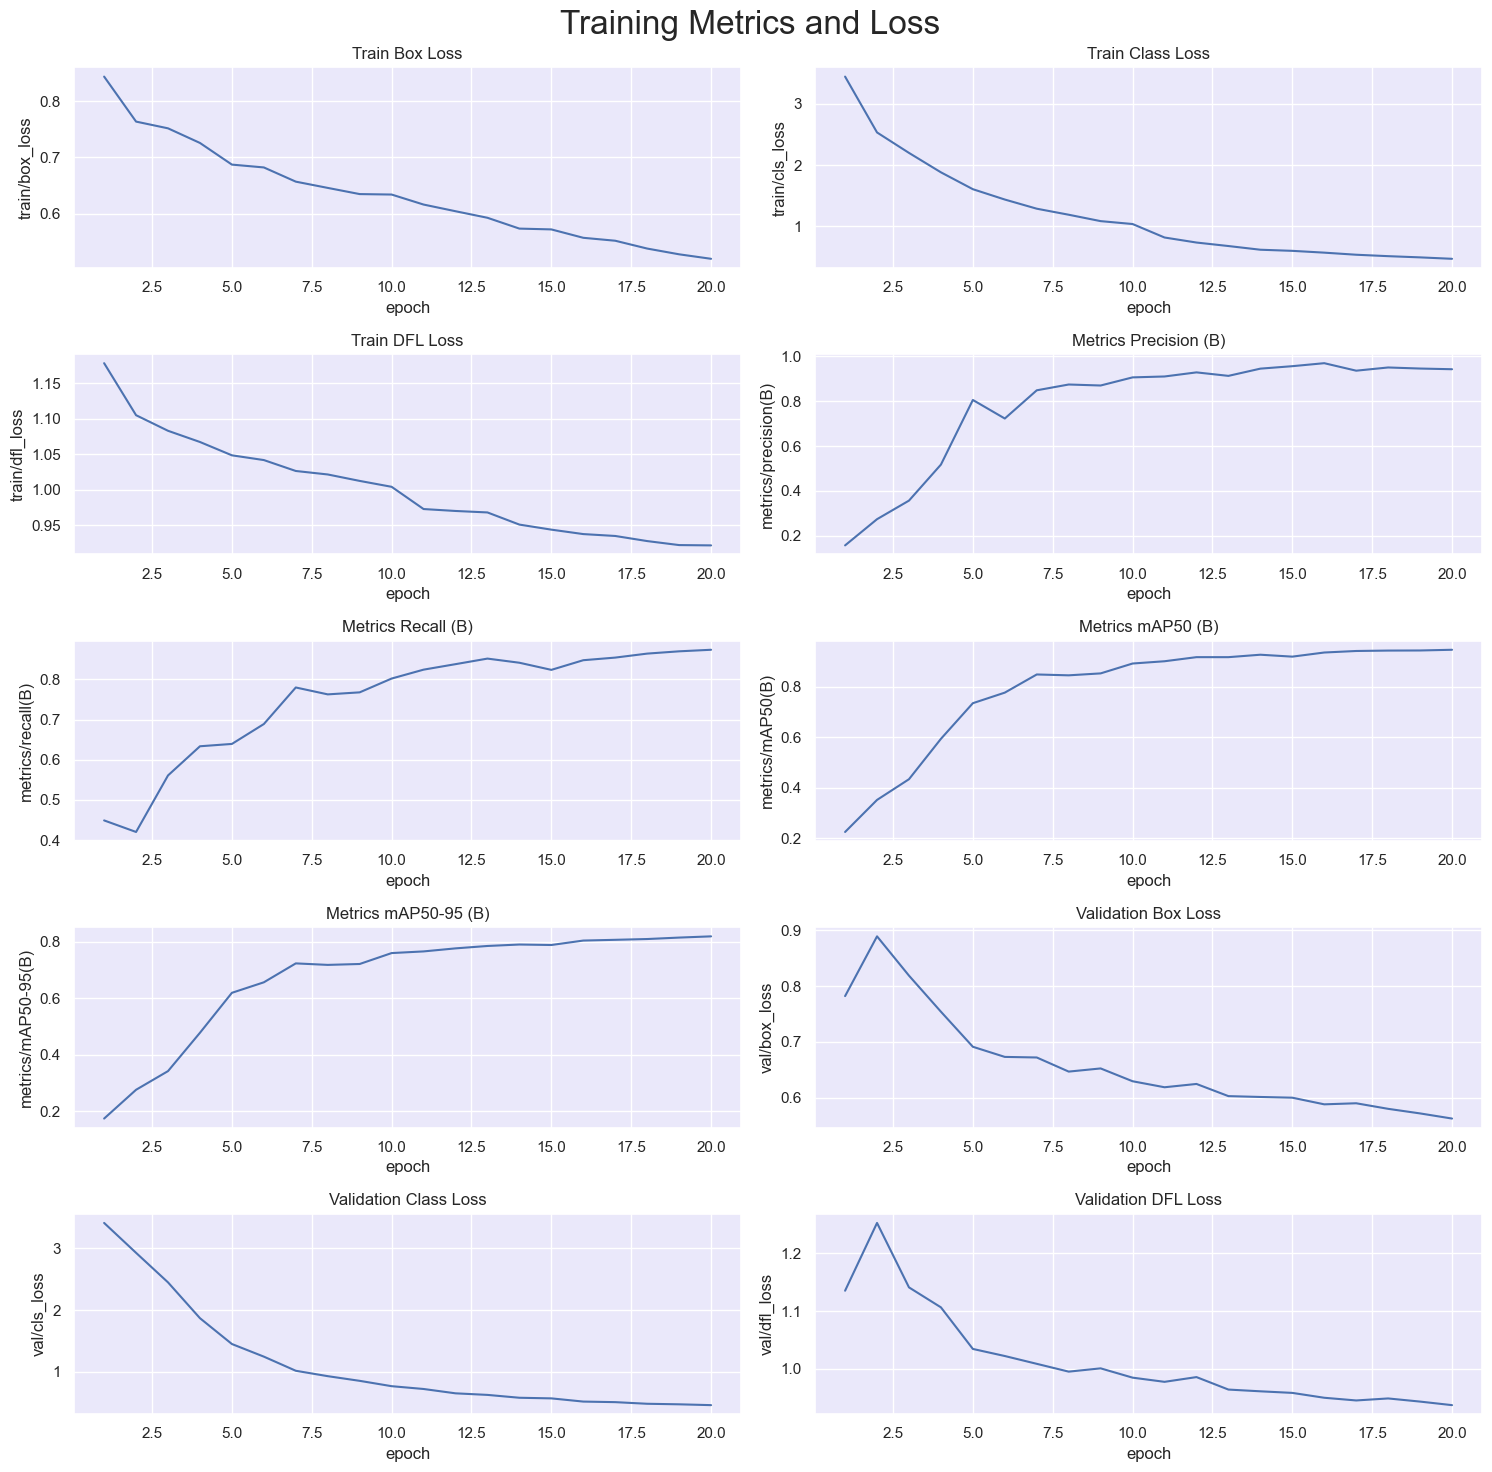

In [33]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [34]:
# Loading the best performing model
Valid_model = YOLO('D:\\GuruJI\YOLO\\train4\\weights\\best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.243  Python-3.13.12 torch-2.9.1+cpu CPU (Intel Core i5-8400H 2.50GHz)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 27.210.7 MB/s, size: 18.1 KB)
val: Scanning D:\GuruJI\YOLO\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 443.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 2.7s/it 2:182.7ss
                   all        801        944      0.941      0.875      0.946      0.819
           Green Light         87        122      0.876      0.695      0.812       0.49
             Red Light         74        108      0.847      0.718      0.813      0.495
       Speed Limit 100         52         52       0.88      0.942      0.977      0.882
       Speed Limit 110         17         17       0.88          1      0.972      0.888
       Speed Limit 120         60         60


0: 640x640 1 Speed Limit 30, 209.4ms
Speed: 5.9ms preprocess, 209.4ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 192.6ms
Speed: 11.7ms preprocess, 192.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 354.6ms
Speed: 5.6ms preprocess, 354.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 276.1ms
Speed: 6.7ms preprocess, 276.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 330.6ms
Speed: 9.3ms preprocess, 330.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 191.6ms
Speed: 6.8ms preprocess, 191.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 171.2ms
Speed: 5.6ms preprocess, 171.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 195.7ms
Speed: 82.3ms preprocess, 195

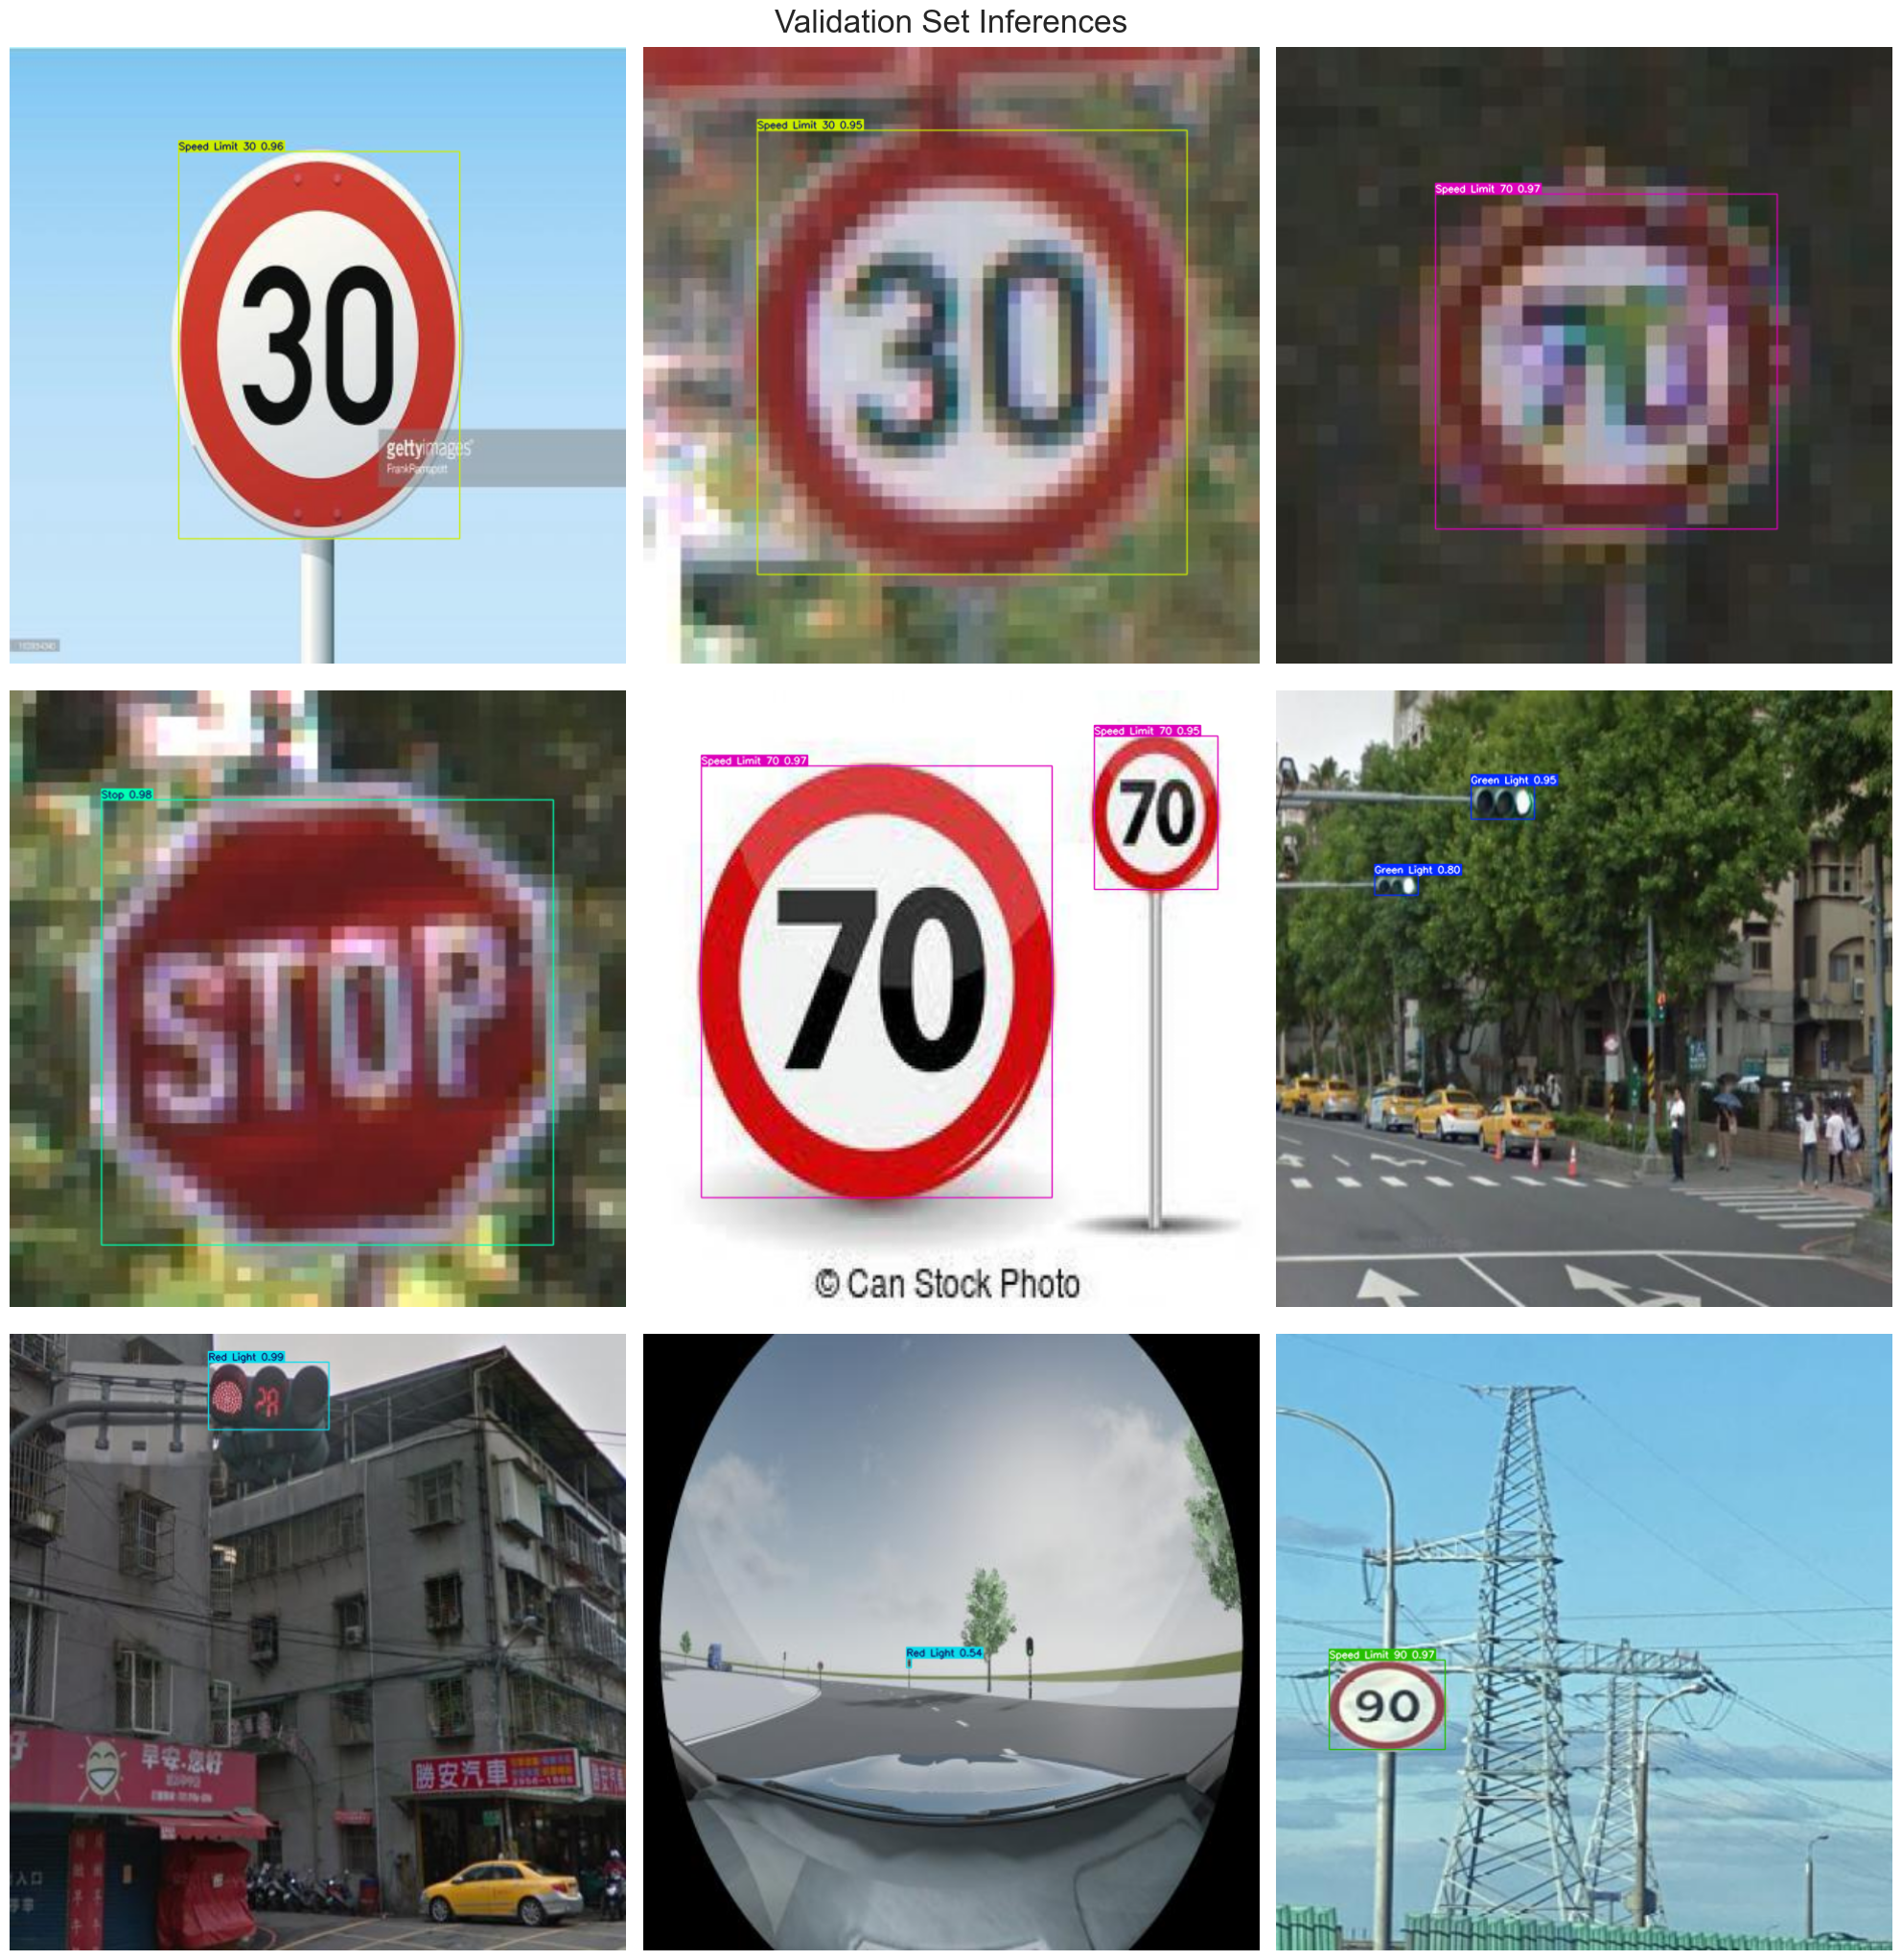

In [35]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'D:\\GuruJI\\YOLO\\car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [38]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

# Display the video
Video("output.mp4", width=960, embed=True)

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from ultralytics import YOLO
import cv2

# Load your trained model
model = YOLO(r"D:\GuruJI\YOLO\train4\weights\best.pt")

# Open webcam (0 = default camera, change to 1 for external camera)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("⚠️ Failed to grab frame")
        break

    # Run YOLO detection on the frame
    results = model(frame)

    # Draw results on frame
    annotated_frame = results[0].plot()

    # Show the frame
    cv2.imshow("🚗 Car Detection - Live Camera", annotated_frame)

    # Press 'Q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 243.1ms
Speed: 8.3ms preprocess, 243.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 378.8ms
Speed: 7.0ms preprocess, 378.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 477.9ms
Speed: 14.2ms preprocess, 477.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Red Light, 327.0ms
Speed: 6.6ms preprocess, 327.0ms inference, 43.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Red Light, 350.9ms
Speed: 27.9ms preprocess, 350.9ms inference, 4.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Red Light, 275.6ms
Speed: 6.8ms preprocess, 275.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Red Light, 311.4ms
Speed: 5.5ms preprocess, 311.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Red Light, 298.0ms
Speed: 5.3ms preprocess, 298.0ms in

KeyboardInterrupt: 

: 